#### Implementing The Perceptron Algorithm

In [1]:
#import packages
import sklearn.datasets

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics

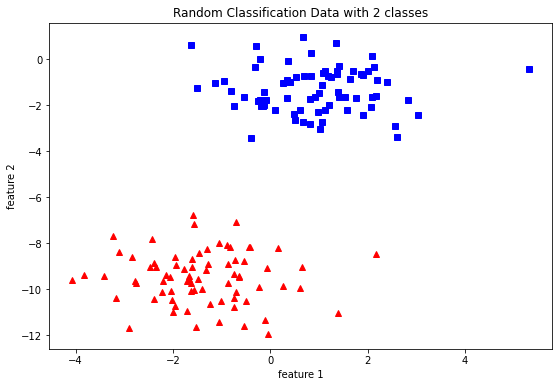

In [5]:
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=150,
                           n_features=2,
                           centers=2,
                           cluster_std=1.05,
                           random_state=2)
#Plotting
fig = plt.figure(figsize=(9, 6))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes');

In [6]:
def step_func(z):
    return 1.0 if (z > 0) else 0.0

In [7]:
def perceptron(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list


In [11]:
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(9,5))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')

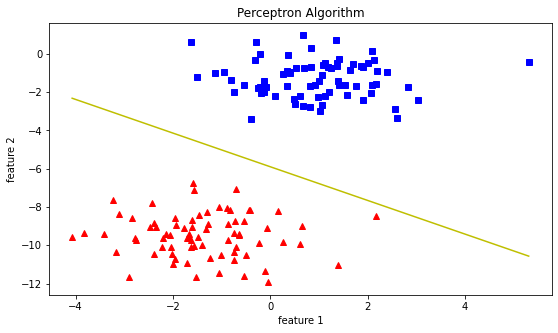

In [12]:
theta, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)

In [2]:
#load the breast cancer data
breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
#convert the data to pandas dataframe.
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["class"] = breast_cancer.target

data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


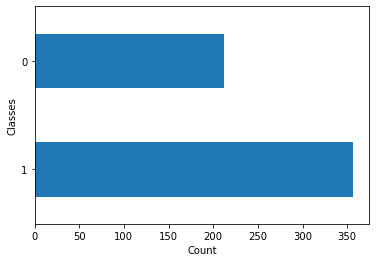

In [4]:
#plotting a graph to see class imbalance
data['class'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Classes");

In [5]:
from sklearn.preprocessing import MinMaxScaler

#perform scaling on the data.
X = data.drop("class", axis = 1)
Y = data["class"]

mnscaler = MinMaxScaler()

X = mnscaler.fit_transform(X)

X = pd.DataFrame(X, columns=data.drop("class",axis = 1).columns)

In [6]:
#train test split.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)

In [7]:
class Perceptron:
  
    #constructor
    def __init__ (self):
        self.w = None
        self.b = None
    
    #model  
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0
  
    #predictor to predict on the data based on w
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
            
        return np.array(Y)
    
    def fit(self, X, Y, epochs = 1, lr = 1):
        self.w = np.ones(X.shape[1])
        self.b = 0
        
        accuracy     = {}
        max_accuracy = 0
        wt_matrix    = []
        
        #for all epochs
        for i in range(epochs):
            
            for x, y in zip(X, Y):
                
                y_pred = self.model(x)

                if y == 1 and y_pred == 0:

                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1

                elif y == 0 and y_pred == 1:

                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1

            wt_matrix.append(self.w)    

            accuracy[i] = metrics.accuracy_score(self.predict(X), Y)

            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                
                chkptw = self.w
                chkptb = self.b

        #checkpoint (Save the weights and b value)
        self.w = chkptw
        self.b = chkptb

        print('Maximum accuracy = {}'.format(max_accuracy))
        
        #plot the accuracy values over epochs
        plt.figure(figsize=(16, 5))
        plt.plot(list(accuracy.values()))
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
    
        #return the weight matrix, that contains weights over all epochs
        return np.array(wt_matrix), accuracy

In [8]:
perceptron = Perceptron()

In [9]:
perceptron.b, perceptron.w

(None, None)

Maximum accuracy = 0.96875


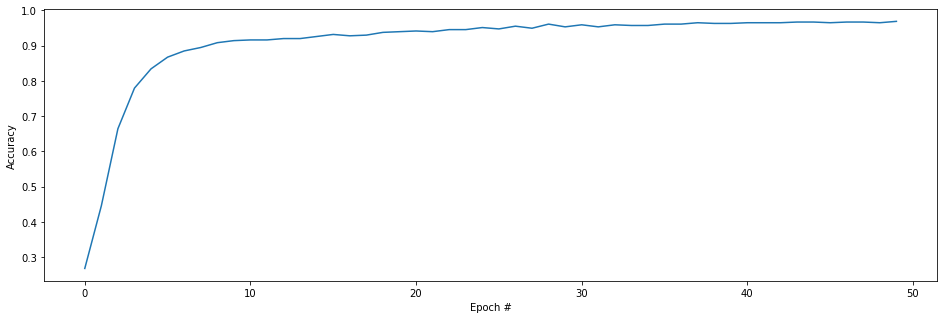

In [10]:
#epochs = 10000 and lr = 0.3
wt_matrix, acc = perceptron.fit(X_train.values, Y_train.values, 50, 0.01)

In [11]:
#making predictions on test data
Y_pred_test = perceptron.predict(X_test.values)

#checking the accuracy of the model
print(metrics.accuracy_score(Y_pred_test, Y_test))

0.9649122807017544
